# Image Classification using Convolutional Neural Networks in PyTorch
This tutorial series is a hands-on beginner-friendly introduction to deep learning using [PyTorch](https://pytorch.org), an open-source neural networks library. These tutorials take a practical and coding-focused approach. The best way to learn the material is to execute the code and experiment with it yourself.

This tutorial covers the following topics: 

- Understanding convolution and pooling layers
- Creating a convolutional neural network (CNN) using PyTorch
- Training a CNN from scratch and monitoring performance
- Underfitting, overfitting and how to overcome them

### How to run the code

You can _run_ this tutorial and experiment with the code examples in a couple of ways: *using free online resources* (recommended) or *on your computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing the code is to click the **Run** button at the top of this page and select **Run on Colab**. [Google Colab](https://colab.research.google.com) is a free online platform for running Jupyter notebooks using Google's cloud infrastructure.


#### Option 2: Running on your computer locally

To run the code on your computer locally, you'll need to set up [Python](https://www.python.org), download the notebook and install the required libraries. We recommend using the [Conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/) distribution of Python. Click the **Run** button at the top of this page, select the **Run Locally** option, and follow the instructions.

## Exploring the CIFAR10 Dataset

In this tutorial, we'll use the 10% CIFAR10 dataset, which consists of 6000 32x32 px colour images in 10 classes. Here are some sample images from the dataset:

<img src="https://miro.medium.com/max/709/1*LyV7_xga4jUHdx4_jHk1PQ.png" style="max-width:480px">

In [1]:
# Uncomment and run the appropriate command for your operating system, if required

# Linux / Binder / Windows (No GPU)
# !pip install numpy matplotlib torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# Linux / Windows (GPU)
# pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
 
# MacOS (NO GPU)
# !pip install numpy matplotlib torch torchvision torchaudio

In [2]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
import zipfile

In [3]:
# zip_path='./data.zip'
# # 文件存储路径
# save_path = './'

# # 读取压缩文件
# file=zipfile.ZipFile(zip_path)
# # 解压文件
# print('开始解压...')
# file.extractall(save_path)
# print('解压结束。')
# # 关闭文件流
# file.close()

The dataset is in the directory `data/cifar10`. It contains 2 folders `train` and `test`, containing the training set (5000 images) and test set (1000 images) respectively. Each of them contains 10 folders, one for each class of images. Let's verify this using `os.listdir`.

In [4]:
data_dir = 'small_data/cifar10'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['test', 'train']
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


The above directory structure (one folder per class) is used by many computer vision datasets, and most deep learning libraries provide utilites for working with such datasets. We can use the `ImageFolder` class from `torchvision` to load the data as PyTorch tensors.

In [5]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import torchvision.transforms as tt
import numpy as np

In [6]:
stats = ((0.4914, 0.4822, 0.4465), (0.247, 0.2435, 0.2616))
train_tfms = tt.Compose([tt.RandomCrop(32, padding=4, padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(), 
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)])
valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)])
dataset = ImageFolder(data_dir+'/train', transform=train_tfms)
# train_data = np.concatenate([np.array(image)[None, :] for image, _ in dataset], axis=0)
# mean = np.mean(train_data, axis=(0,2,3))
# std = np.std(train_data, axis=(0,2,3))
# print(mean, std)

Let's look at a sample element from the training dataset. Each element is a tuple, containing a image tensor and a label. Since the data consists of 32x32 px color images with 3 channels (RGB), each image tensor has the shape `(3, 32, 32)`.

In [7]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[ 1.5193,  1.4875,  1.4717,  ...,  1.7575,  1.7257,  1.6781],
         [ 1.5511,  1.5193,  1.5034,  ...,  1.9003,  1.8845,  1.8686],
         [ 1.5987,  1.5669,  1.5352,  ...,  1.9797,  1.9797,  1.9797],
         ...,
         [-0.1636,  0.5667,  1.0906,  ...,  1.3129,  1.5669,  1.7575],
         [-0.8305, -0.3383,  0.3762,  ...,  1.3923,  1.6304,  1.8051],
         [-0.9099, -0.7035, -0.0843,  ...,  1.5669,  1.8686,  1.9956]],

        [[ 1.6111,  1.5789,  1.5628,  ...,  1.8205,  1.7883,  1.7400],
         [ 1.6433,  1.6111,  1.5950,  ...,  1.9815,  1.9654,  1.9493],
         [ 1.6917,  1.6594,  1.6272,  ...,  2.0621,  2.0621,  2.0782],
         ...,
         [-0.0960,  0.6287,  1.1441,  ...,  1.3696,  1.6272,  1.8044],
         [-0.8368, -0.3376,  0.4194,  ...,  1.4662,  1.6917,  1.8366],
         [-0.9335, -0.7080, -0.0316,  ...,  1.6433,  1.9332,  2.0138]],

        [[ 1.6211,  1.5762,  1.5162,  ...,  1.8010,  1.7710,  1.7261],
         [ 1.6211,  1.6061,  1.5612,  ...,  1

The list of classes is stored in the `.classes` property of the dataset. The numeric label for each element corresponds to index of the element's label in the list of classes.

In [8]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


We can view the image using `matplotlib`, but we need to change the tensor dimensions to `(32,32,3)`. Let's create a helper function to display an image and its label.

In [9]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [10]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Let's look at a couple of images from the dataset. As you can tell, the 32x32px images are quite difficult to identify, even for the human eye. Try changing the indices below to view different images.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  airplane (0)


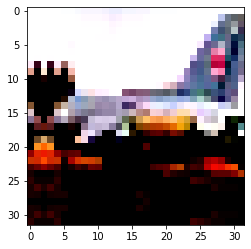

In [13]:
show_example(*dataset[123])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  truck (9)


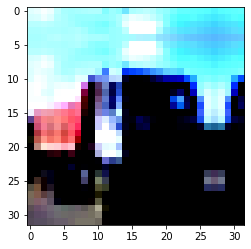

In [14]:
show_example(*dataset[4554])

## Training and Validation Datasets

While building real world machine learning models, it is quite common to split the dataset into 3 parts:

1. **Training set** - used to train the model i.e. compute the loss and adjust the weights of the model using gradient descent.
2. **Validation set** - used to evaluate the model while training, adjust hyperparameters (learning rate etc.) and pick the best version of the model.
3. **Test set** - used to compare different models, or different types of modeling approaches, and report the final accuracy of the model.

Since there's no predefined validation set, we can set aside a small portion (5000 images) of the training set to be used as the validation set. We'll use the `random_split` helper method from PyTorch to do this. To ensure that we always create the same validation set, we'll also set a seed for the random number generator.

In [15]:
random_seed = 42
torch.manual_seed(random_seed);

In [16]:
val_size = int(len(dataset) * 0.1)
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(4500, 500)

We can now create data loaders for training and validation, to load the data in batches.

In [17]:
from torch.utils.data.dataloader import DataLoader

batch_size=64

In [18]:
'''generate dataloader of train and validation, named train_dl and val_dl respectively'''
#################### START CODE ####################
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=2, pin_memory=True)
##################### END CODE #####################

We can look at batches of images from the dataset using the `make_grid` method from `torchvision`. Each time the following code is run, we get a different bach, since the sampler shuffles the indices before creating batches.

In [19]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


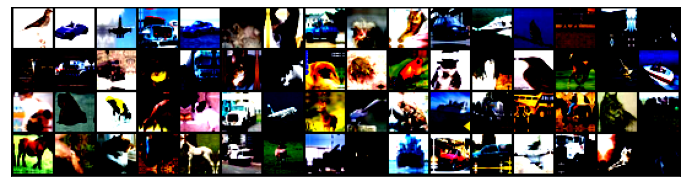

In [20]:
show_batch(train_dl)

## Defining the Model (Convolutional Neural Network)

In this tutorial however, we will use a convolutional neural network, using the `nn.Conv2d` class from PyTorch.

> The 2D convolution is a fairly simple operation at heart: you start with a kernel, which is simply a small matrix of weights. This kernel “slides” over the 2D input data, performing an elementwise multiplication with the part of the input it is currently on, and then summing up the results into a single output pixel. - [Source](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)

<img src="https://miro.medium.com/max/1070/1*Zx-ZMLKab7VOCQTxdZ1OAw.gif" style="max-width:400px;">


Let us implement a convolution operation on a 1 channel image with a 3x3 kernel.

In [21]:
def apply_kernel(image, kernel):
    '''write the function of apply_kernel'''
    #################### START CODE ####################
    img_h, img_w = image.shape 
    kernel_h, kernel_w = kernel.shape
    output = torch.zeros([img_h - kernel_h + 1, img_w - kernel_w + 1])
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            output[i, j] = torch.sum(image[i:i + kernel_h, j:j + kernel_w] *
                                     kernel)
    return output
    ##################### END CODE #####################

In [22]:
sample_image = torch.tensor([
    [3, 3, 2, 1, 0], 
    [0, 0, 1, 3, 1], 
    [3, 1, 2, 2, 3], 
    [2, 0, 0, 2, 2], 
    [2, 0, 0, 0, 1]
], dtype=torch.float32)

sample_kernel = torch.tensor([
    [0, 1, 2], 
    [2, 2, 0], 
    [0, 1, 2]
], dtype=torch.float32)

apply_kernel(sample_image, sample_kernel)

tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

For multi-channel images, a different kernel is applied to each channels, and the outputs are added together pixel-wise. 

There are certain advantages offered by convolutional layers when working with image data:

* **Fewer parameters**: A small set of parameters (the kernel) is used to calculate outputs of the entire image, so the model has much fewer parameters compared to a fully connected layer. 
* **Sparsity of connections**: In each layer, each output element only depends on a small number of input elements, which makes the forward and backward passes more efficient.
* **Parameter sharing and spatial invariance**: The features learned by a kernel in one part of the image can be used to detect similar pattern in a different part of another image.

We will also use a [max-pooling](https://computersciencewiki.org/index.php/Max-pooling_/_Pooling) layers to progressively decrease the height & width of the output tensors from each convolutional layer.

<img src="https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png" style="max-width:400px;">

Before we define the entire model, let's look at how a single convolutional layer followed by a max-pooling layer operates on the data.

In [23]:
import torch.nn as nn
import torch.nn.functional as F

In [24]:
simple_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2, 2)
)

Refer to [Sylvian's post](https://sgugger.github.io/convolution-in-depth.html) for an explanation of `kernel_size`, `stride` and `padding`.

In [25]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    '''write the out value'''
    #################### START CODE ####################
    out = simple_model(images)
    ##################### END CODE #####################
    print('out.shape:', out.shape)
    break

images.shape: torch.Size([64, 3, 32, 32])
out.shape: torch.Size([64, 8, 16, 16])


The `Conv2d` layer transforms a 3-channel image to a 16-channel *feature map*, and the `MaxPool2d` layer halves the height and width. The feature map gets smaller as we add more layers, until we are finally left with a small feature map, which can be flattened into a vector. We can then add some fully connected layers at the end to get vector of size 10 for each image.

<img src="https://i.imgur.com/KKtPOKE.png" style="max-width:540px">

Let's define the model by extending an `ImageClassificationBase` class which contains helper methods for training & validation.

In [26]:
class ImageClassificationBase(nn.Module):

    def training_step(self, batch):
        images, labels = batch
        '''write the generation of predictions and the entropy loss'''
        #################### START CODE ####################
        loss = F.cross_entropy(self(images), labels)
        ##################### END CODE #####################
        return loss

    def validation_step(self, batch):
        images, labels = batch
        '''write the generation of predictions and the entropy loss, and the accuracy'''
        #################### START CODE ####################
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        ##################### END CODE #####################
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()  # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()  # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print(
            "Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}"
            .format(epoch, result['train_loss'], result['val_loss'],
                    result['val_acc']))


def accuracy(outputs, labels):
    '''write the function of accuracy'''
    #################### START CODE ####################
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))
    ##################### END CODE #####################

We'll use `nn.Sequential` to chain the layers and activations functions into a single network architecture.

In [27]:
class ResidualBlock(nn.Module):
    def __init__(self, inchannel, outchannel, stride=1):
        super(ResidualBlock, self).__init__()
        self.left = nn.Sequential(
            nn.Conv2d(inchannel, outchannel, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm2d(outchannel),
            nn.ReLU(inplace=True),
            nn.Conv2d(outchannel, outchannel, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(outchannel)
        )
        self.shortcut = nn.Sequential()
        if stride != 1 or inchannel != outchannel:
            self.shortcut = nn.Sequential(
                nn.BatchNorm2d(inchannel),
                nn.ReLU(inplace=True),
                nn.Conv2d(inchannel, outchannel, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(outchannel)
            )
            
    def forward(self, x):
        out = self.left(x)
        out = out + self.shortcut(x)
        out = F.relu(out)
        
        return out

class ResNet(ImageClassificationBase):
    def __init__(self, ResidualBlock, num_classes=10):
        super(ResNet, self).__init__()
        self.inchannel = 64
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        self.layer1 = self.make_layer(ResidualBlock, 64, 2, stride=1)
        self.layer2 = self.make_layer(ResidualBlock, 128, 2, stride=2)
        self.layer3 = self.make_layer(ResidualBlock, 256, 2, stride=2)        
        self.layer4 = self.make_layer(ResidualBlock, 512, 2, stride=2)        
        self.fc = nn.Linear(512, num_classes)
        
    def make_layer(self, block, channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.inchannel, channels, stride))
            self.inchannel = channels
        return nn.Sequential(*layers)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out
def ResNet18():
    return ResNet(ResidualBlock)

In [28]:
model = ResNet18()
model

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer1): Sequential(
    (0): ResidualBlock(
      (left): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (shortcut): Sequential()
    )
    (1): ResidualBlock(
      (left): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inp

Let's verify that the model produces the expected output on a batch of training data. The 10 outputs for each image can be interpreted as probabilities for the 10 target classes (after applying softmax), and the class with the highest probability is chosen as the label predicted by the model for the input image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


images.shape: torch.Size([64, 3, 32, 32])
out.shape: torch.Size([64, 10])
out[0]: tensor([-0.1892,  0.3715,  0.0209,  0.4285, -0.1992, -0.0006, -0.2773,  0.0086,
        -0.1293, -0.3017], grad_fn=<SelectBackward0>)
MAX tensor(0.4285, grad_fn=<MaxBackward1>)
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Label:  frog (tensor(6))


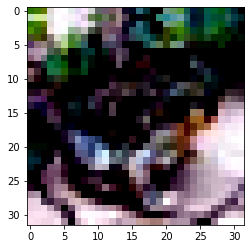

In [29]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    print("MAX",torch.max(out[0]))
    print(dataset.classes)
    show_example(images[0],labels[0])
    break

To seamlessly use a GPU, if one is available, we define a couple of helper functions (`get_default_device` & `to_device`) and a helper class `DeviceDataLoader` to move our model & data to the GPU as required. These are described in more detail in the [previous tutorial](https://jovian.ml/aakashns/04-feedforward-nn#C21).

In [30]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

Based on where you're running this notebook, your default device could be a CPU (`torch.device('cpu')`) or a GPU (`torch.device('cuda')`)

In [31]:
device = get_default_device()
device

device(type='cuda')

We can now wrap our training and validation data loaders using `DeviceDataLoader` for automatically transferring batches of data to the GPU (if available), and use `to_device` to move our model to the GPU (if available).

In [32]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

## Training the Model

We'll define two functions: `fit` and `evaluate` to train the model using gradient descent and evaluate its performance on the validation set. 

In [33]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            '''Calculate the loss, and complete the train_losses'''
            #################### START CODE ####################
            loss = model.training_step(batch)
            train_losses.append(loss)
            ##################### END CODE #####################
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history
def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

Before we begin training, let's instantiate the model once again and see how it performs on the validation set with the initial set of parameters.

In [34]:
model = to_device(ResNet18(), device)
model2 = to_device(ResNet18(), device)

In [35]:
'''Set the num_epochs, lr and opt_func'''
#################### START CODE ####################
num_epochs = 30
lr = 0.001
##################### END CODE #####################
opt_func = torch.optim.Adam

In [36]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 1.9740, val_loss: 2.2390, val_acc: 0.3022
Epoch [1], train_loss: 1.6536, val_loss: 1.7167, val_acc: 0.3317
Epoch [2], train_loss: 1.5632, val_loss: 1.5995, val_acc: 0.4413
Epoch [3], train_loss: 1.4709, val_loss: 1.5064, val_acc: 0.4803
Epoch [4], train_loss: 1.3592, val_loss: 1.5549, val_acc: 0.4564
Epoch [5], train_loss: 1.2656, val_loss: 1.4992, val_acc: 0.4480
Epoch [6], train_loss: 1.2009, val_loss: 1.3375, val_acc: 0.5624
Epoch [7], train_loss: 1.1401, val_loss: 1.4353, val_acc: 0.4961
Epoch [8], train_loss: 1.0892, val_loss: 1.1487, val_acc: 0.6014
Epoch [9], train_loss: 1.0407, val_loss: 1.2050, val_acc: 0.5800
Epoch [10], train_loss: 0.9792, val_loss: 1.3696, val_acc: 0.5414
Epoch [11], train_loss: 0.9335, val_loss: 1.2778, val_acc: 0.5459
Epoch [12], train_loss: 0.8881, val_loss: 1.4439, val_acc: 0.5240
Epoch [13], train_loss: 0.8635, val_loss: 1.3412, val_acc: 0.5639
Epoch [14], train_loss: 0.7870, val_loss: 1.1969, val_acc: 0.5893
Epoch [15], train_lo

In [37]:
history_1cycle = fit_one_cycle(num_epochs, 0.01, model2, train_dl, val_dl, weight_decay=1e-4,grad_clip=0.1)

Epoch [0], train_loss: 2.1116, val_loss: 2.0119, val_acc: 0.2687
Epoch [1], train_loss: 1.7559, val_loss: 1.8538, val_acc: 0.3024
Epoch [2], train_loss: 1.6416, val_loss: 1.7639, val_acc: 0.3762
Epoch [3], train_loss: 1.5876, val_loss: 1.7408, val_acc: 0.3503
Epoch [4], train_loss: 1.4530, val_loss: 1.5507, val_acc: 0.4586
Epoch [5], train_loss: 1.3563, val_loss: 1.4791, val_acc: 0.4709
Epoch [6], train_loss: 1.2752, val_loss: 1.4848, val_acc: 0.4918
Epoch [7], train_loss: 1.2380, val_loss: 2.0092, val_acc: 0.3702
Epoch [8], train_loss: 1.1617, val_loss: 1.5284, val_acc: 0.4865
Epoch [9], train_loss: 1.0611, val_loss: 1.3442, val_acc: 0.5336
Epoch [10], train_loss: 1.0095, val_loss: 1.5387, val_acc: 0.5403
Epoch [11], train_loss: 0.9340, val_loss: 1.2183, val_acc: 0.6061
Epoch [12], train_loss: 0.8817, val_loss: 1.3572, val_acc: 0.5663
Epoch [13], train_loss: 0.8324, val_loss: 1.3345, val_acc: 0.5750
Epoch [14], train_loss: 0.7654, val_loss: 1.1281, val_acc: 0.6257
Epoch [15], train_lo

We can plot the valdation set accuracies to study how the model improves over time.

In [38]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    '''plot the accuracy'''
    #################### START CODE ####################
    plt.plot(accuracies)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    ##################### END CODE #####################

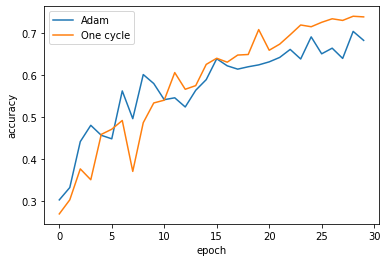

In [39]:
plot_accuracies(history)
plot_accuracies(history_1cycle)
plt.legend(["Adam","One cycle"])
plt.show()

Our model reaches an accuracy of above 55%. This suggests that we might need to use a more powerful model to capture the relationship between the images and the labels more accurately. This can be done by adding more convolutional layers to our model, or incrasing the no. of channels in each convolutional layer, or by using regularization techniques.

We can also plot the training and validation losses to study the trend.

In [40]:
def plot_losses(history):
    '''plot the train_losses and val_losses'''
    #################### START CODE ####################
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses)
    plt.plot(val_losses)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    ##################### END CODE #####################

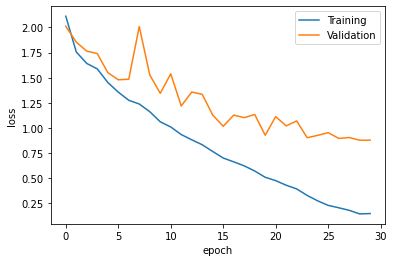

In [42]:
# plot_losses(history)
plot_losses(history_1cycle)
# plt.legend(["Adam-training","Adam-validation", "One cycle-training", "One cycle-validation"])
plt.show()

Initialy, both the training and validation losses seem to decrease over time. However, if you train the model for long enough, you will notice that the training loss continues to decrease, while the validation loss stops decreasing, and even starts to increase after a certain point! 

<img src="https://i.stack.imgur.com/1QU0m.png" style="max-width:400px;">

This phenomenon is called **overfitting**, and it is the no. 1 why many machine learning models give rather terrible results on real-world data. It happens because the model, in an attempt to minimize the loss, starts to learn patters are are unique to the training data, sometimes even memorizing specific training examples. Because of this, the model does not generalize well to previously unseen data.


Following are some common stragegies for avoiding overfitting:

- Gathering and generating more training data, or adding noise to it
- Using regularization techniques like batch normalization & dropout
- Early stopping of model's training, when validation loss starts to increase

In [57]:
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch')
    plt.ylabel('Learning rate')

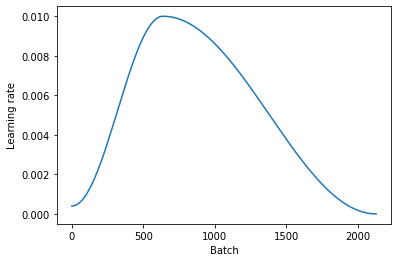

In [58]:
plot_lrs(history_1cycle)

## Testing with individual images

While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. Let's test out our model with some images from the predefined test dataset of 10000 images. We begin by creating a test dataset using the `ImageFolder` class.

Let's define a helper function `predict_image`, which returns the predicted label for a single image tensor.

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    '''get predictions from model and pick index with highest probability'''
    #################### START CODE ####################
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    ##################### END CODE #####################
    return dataset.classes[preds[0].item()]

In [ ]:
img, label = val_ds[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
img, label = val_ds[1]
plt.imshow(img.permute(1, 2, 0))
print('Predicted:', predict_image(img, model))

In [ ]:
img, label = val_ds[2]
plt.imshow(img.permute(1, 2, 0))
print('Predicted:', predict_image(img, model))

In [ ]:
img, label = val_ds[3]
plt.imshow(img.permute(1, 2, 0))
print('Predicted:', predict_image(img, model))

In [44]:
test_dataset = ImageFolder('data/cifar10/test', transform=valid_tfms)

Identifying where our model performs poorly can help us improve the model, by collecting more training data, increasing/decreasing the complexity of the model, and changing the hypeparameters.

As a final step, let's also look at the overall loss and accuracy of the model on the test set. We expect these values to be similar to those for the validation set. If not, we might need a better validation set that has similar data and distribution as the test set (which often comes from real world data).

In [ ]:
@torch.no_grad()
def output_step(model, batch):
    '''write the function of output_step'''
    #################### START CODE ####################
    model.eval()
    images, _ = batch
    out = model(images)
    _, preds = torch.max(out, dim=1)
    return preds
    ##################### END CODE #####################

In [45]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result2 = evaluate(model2, test_loader)
print(result, result2)
# outputs=[]
# for batch in test_loader:
#     outputs.extend(output_step(model,batch).cpu().numpy())

# print(outputs)

{'val_loss': 0.995947003364563, 'val_acc': 0.7100474834442139} {'val_loss': 0.7998878359794617, 'val_acc': 0.762460470199585}


Save the test_target.

In [ ]:
with open("test_target.csv", "w", newline='') as csvfile:
    for i in outputs:
        csvfile.write(str(i))
        csvfile.write('\n')

## Saving and loading the model

Since we've trained our model for a long time and achieved a resonable accuracy, it would be a good idea to save the weights of the model to disk, so that we can reuse the model later and avoid retraining from scratch. Here's how you can save the model.

In [ ]:
torch.save(model.state_dict(), f'cifar10-res.pth')

## Summary and Further Reading/Exercises

We've covered a lot of ground in this tutorial. Here's quick recap of the topics:
* Introduction to the CIFAR10 dataset for image classification
* Downloading, extracing and loading an image dataset using `torchvision`
* Show random batches of images in a grid using `torchvision.utils.make_grid`
* Creating a convolutional neural network using with `nn.Conv2d` and `nn.MaxPool2d` layers
* Training a convolutional neural network and visualizing the losses and errors
* Understanding overfitting and the strategies for avoiding it (more on this later)
* Generating predictions on single images from the test set

In [ ]:
import pandas as pd

# 读取模型输出和真实标签的CSV文件
model_output = pd.read_csv('./test_target.csv', header=None)
true_labels = pd.read_csv('./测试集正确标签/test_target.csv', header=None)
# 提取预测结果和真实标签列
predicted_labels = model_output[0]
actual_labels = true_labels[0]

# 计算准确率
correct_predictions = (predicted_labels == actual_labels).sum()
total_predictions = len(predicted_labels)
accuracy = correct_predictions / total_predictions

# 打印准确率
print(f'准确率: {accuracy * 100} %')
